#### Nombre: Marcel Parada Villamizar  
#### Código: 1007407019


## Ejemplo 10.2

Este ejercicio analiza una versión más avanzada de la simple simulación del decaimiento radiactivo en el ejemplo 10.1

<img src="Imagenejercicio10.2.png">

El isótopo 213Bi decae a 209Bi estable a través de una de dos rutas diferentes, con probabilidades y vidas medias como se muestra en la figura. (Técnicamente, 209Bi no es realmente estable, pero tiene una vida media de más de 10x19 años, mil millones de veces la edad del universo, por lo que también podría serlo).

Comenzando con una muestra que consta de 10000 átomos de 213Bi, simule el decaimiento de los átomos como en el Ejemplo 10.1 dividiendo el tiempo en segmentos de longitud Deltat = 1 s cada uno y en cada paso haciendo lo siguiente:

a) Para cada átomo de 209Pb a su vez, decida al azar, con la probabilidad apropiada, si decae o no. (La probabilidad se puede calcular a partir de la ecuación (10.3).) Cuente el número total que decae, reste del número de átomos de 209Pb y súmelo al número de átomos de 209Bi.

<img src="Imagenejercicio10.2-1.png">

b) Ahora haga lo mismo para 209TI, excepto que los átomos en decaimiento se restan del total de 209TI y se suman al total de 209Pb.

c) Para 213Bi, la situación es más complicada: cuando un átomo de 213Bi decae, debe decidir al azar con la probabilidad apropiada la ruta por la que se decae. Cuente los números que decaen por cada ruta y sume y reste en consecuencia.

Tenga en cuenta que tiene que trabajar la cadena desde la parte inferior de esta manera, no hacia abajo desde la parte superior, para evitar que el mismo átomo se descomponga dos veces en un solo paso.

Mantenga un registro de la cantidad de átomos de cada uno de los cuatro isótopos en todo momento durante 20000 segundos y haga un solo gráfico que muestre los cuatro números en función del tiempo en los mismos ejes.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


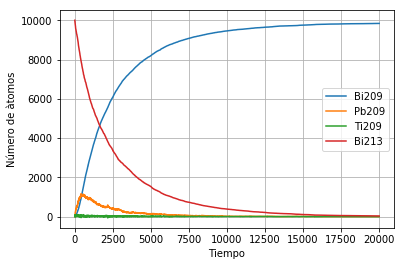

In [4]:
from random import random
from numpy import arange
from pylab import *


NBi213 = 10000      #Cantidad de átomos de Bismuto213
NPb = 0             #Cantidad de átomos de Plomo209
NTi = 0             #Cantidad de átomos de Talio209
Nbi209= 0           #Cantidad de átomos de Bismuto209

tauBi213 = 46*60    #Tiempo de vida del Bismuto en segundos
tauPb = 3.3*60      #Tiempo de vida del Plomo en segundos
tauTI = 2.2*60      #Tiempo de vida del Talio en segundos

h=1.0               #Tamaño del intervalo del tiempo en segundos

pBi213= 1 - 2**(-h/tauBi213)  #Probabilidad de decadimiento en un solo paso
pPb= 1 - 2**(-h/tauPb)     #Probabilidad de decadimiento en un solo paso
pTi= 1 - 2**(-h/tauTI)     #Probabilidad de decadimiento en un solo paso 

tmax = 20000               #Tiempo total

# Lista de puntos de trazas(plot)
tpoints = arange(0.0, tmax,h)
Bi213points = []
Pbpoints = []
Tipoints = []
bi209points = []

# Inicio Ciclos
for t in tpoints:
    Bi213points.append(NBi213)
    Pbpoints.append(NPb)
    Tipoints.append(NTi)
    bi209points.append(Nbi209)
    
    
    #Calcula el número de atomos que estan decaimiento
    decay1=0
    for i in range(NPb):
        if random()<pPb:
            decay1+=1
    NPb-=decay1
    Nbi209+=decay1
    
    decay2=0
    for i in range(NTi):
        if random()<pTi:
            decay2+=1
        NTi-=decay2 
        NPb+=decay2 
    
    decay3=0
    decay4=0
    decay5=0
    for i in range(NBi213):
        if random()<pBi213:
            decay3+=1
            NBi213-=decay3
            if random()>0.0209:
                decay4+=1
                NTi+=decay4
            else:
                if random()<0.9791:
                    decay5 +=1
                    NPb += decay5

#Hacer el gráfico
plot(tpoints,bi209points, label='Bi209')
plot(tpoints,Pbpoints, label='Pb209')
plot(tpoints,Tipoints,label='Ti209')
plot(tpoints,Bi213points,label='Bi213')
xlabel("Tiempo")
ylabel("Número de àtomos")
grid('on')
#ylim(0,1000)
#xlim(0,100)
legend()
show()

## Justificación

La grafica del isotopo Bi213 decae exponencialmente debido a que cede átomos tanto al Pb y Ti, el Pb toma la mayor parte de estos a comparación del talio el cual solo se le es cedido el 2%; luego Ti cede sus átomos al plomo y decae hasta llegar a 0, por último, el plomo a medida que pasa el tiempo termina cediendo toda esa cantidad de átomos al Bi209
